主要是假設股價服從幾何布朗運動，且是對數常態分配
- $S_{t+1}=S_t \mu dt + S_t \sigma dW_t$
- $S_{t+1}=S_te^{(r-0.5\sigma^2)d{t}+\sigma\epsilon\sqrt{d{t}}}$
- $\ln{S_{t+1}}=\ln{S_t} + e^{(r-0.5\sigma^2)d{t}+\sigma\epsilon\sqrt{d{t}}}$
其中:

$\epsilon$是服從標準常態的隨機變數

$r$ 是無風險利率

$S_{t+1}$和$S_{t}$是下一期股價以及本期股價

$\sigma$是標的資產的報酬標準差

$\Delta{t}$是變動期數或是切割期數，例如1年切割250天，則 $\Delta{t}$ 就是 $\frac{1}{250}$

In [23]:
import numpy as np

#parameter setting
np.random.seed(111)
S = 14460 #現貨價
K = 14650 #履約價
r = 0.01 #無風險利率
sigma = 0.05 #現貨的報酬標準差
T = 1 #假設到期1年
days = 1 #每幾天抽樣一次
steps = int(365/days)#切割期數
N = 10000 #模擬路徑
dt = T/steps #delta t

epsilon = np.random.normal(size=(steps, N))
ST = np.log(S) + np.cumsum((r - 0.5*sigma**2)*dt + sigma  * epsilon * np.sqrt(dt), axis=0)
ST = np.exp(ST)
ST

array([[14417.50075379, 14474.89831599, 14517.09397021, ...,
        14525.48056238, 14412.61040748, 14474.05368384],
       [14465.95234466, 14458.53814545, 14541.47804784, ...,
        14585.60494875, 14362.25516465, 14471.08802516],
       [14435.78945925, 14390.40844289, 14531.88485683, ...,
        14608.672309  , 14326.69592059, 14437.83199457],
       ...,
       [14469.71433539, 13787.32933949, 13511.8019413 , ...,
        14263.4734124 , 14068.11899097, 14572.35192084],
       [14437.56207084, 13815.2863921 , 13565.51212999, ...,
        14287.17154043, 14083.82067511, 14545.52354746],
       [14432.72623935, 13842.63415655, 13607.31893065, ...,
        14276.93917247, 14069.91746599, 14520.41861324]])

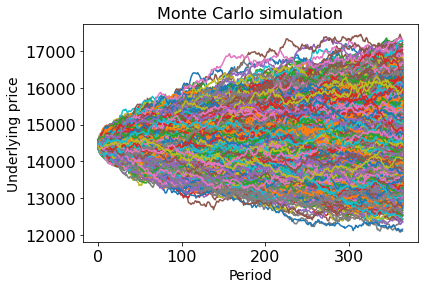

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

plt.plot(ST)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Underlying price', fontsize=14)
plt.title('Monte Carlo simulation', fontsize=16)
# plt.savefig('/CallOption.png', bbox_inches='tight')#save fig
plt.show()

In [33]:
CT = np.maximum(ST[-1]-K, 0).mean() #max(ST-K, 0)
CT

264.863479595564

In [34]:
Ct = CT*np.exp(-r*T) #折現
Ct

262.2280439398143

In [36]:
def MCS(S, steps, N, dt, r):
  epsilon = np.random.normal(size=(steps, N))
  ST = np.log(S) + np.cumsum((r - 0.5*sigma**2)*dt + sigma  * epsilon * np.sqrt(dt), axis=0)
  ST = np.exp(ST)
  return ST

#parameter setting
np.random.seed(111)
S = 14460 #現貨價
K = 14650 #履約價
r = 0.01 #無風險利率
sigma = 0.05 #現貨的報酬標準差
T = 1 #假設到期1年
days = 1 #每幾天抽樣一次
steps = int(365/days)#切割期數
N = 10000 #模擬路徑
dt = T/steps #delta t

ST = MCS(S, steps, N, dt, r)

CT = np.maximum(ST[-1]-K, 0).mean()
Ct = CT*np.exp(-r*T)
print('CT: ', CT, 'Ct: ', Ct)

PT = np.maximum(K-ST[-1], 0).mean()
Pt = PT*np.exp(-r*T)
print('PT: ', PT, 'Pt: ', Pt)

CT:  264.863479595564 Ct:  262.2280439398143
PT:  321.4094040139317 Pt:  318.2113270094123
